# Парадокс формулы Байеса
[Источник](https://ru.wikipedia.org/w/index.php?title=%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0#:~:text=%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80%204%C2%A0%E2%80%94%20%D0%BF%D0%B0%D1%80%D0%B0%D0%B4%D0%BE%D0%BA%D1%81%20%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D1%8B%20%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0%5B%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D1%82%D1%8C,001%7D%7D%5Capprox%200%7B%2C%7D1098%5Cend%7Baligned%7D%7D%7D)

Имеется заболевание с вероятностью распространения ***0,001*** и метод диагностического обследования, с 

$$
P(Б) = 0.9
$$

выявляет больного, 

$$P(«Б»|З) = 0.01$$

ложноположительный результат. ***«Б»*** — событие, что обследование показало, что человек болен. Найти вероятность того, что человек здоров, если он был признан больным при обследовании.

$$P(«Б»| Б) = 0.9$$ 

$$P(«Б» | З)= 0.01$$

$$P(Б) = 0.001,$$ 

значит: $$P(З) = 0.999$$

Вероятность того, что человек здоров, если он был признан больным равна условной вероятности: ***Р(З | «Б»)***. Чтобы её найти, вычислим сначала полную вероятность признания больным: 

$$
P(«Б») = 0.999 * 0.01 + 0.001 * 0.9 = 0.01089
$$

Вероятность, что человек здоров при результате «болен»:

$$ 
P(З | «Б») = {0.999 * 0.01\over(0.999 * 0.01 + 0.001 × 0.9)} ≈ 0.917
$$

Таким образом, ***91,7 %*** людей, у которых обследование показало результат «болен», на самом деле здоровые люди. Причина этого в том, что по условию задачи вероятность ложноположительного результата хоть и мала, но на порядок больше доли больных в обследуемой группе людей.

Если ошибочные результаты обследования можно считать случайными, то повторное обследование того же человека будет давать независимый от первого результат. В этом случае для уменьшения доли ложноположительных результатов имеет смысл провести повторное обследование людей, получивших результат «болен». Вероятность того, что человек здоров после получения повторного результата «болен», также можно вычислить по формуле Байеса: 

$$
P(З | «Б», «Б») = {0.999 * 0.01 * 0.01\over(0.999 * 0.01 * 0.01 + 0.001 * 0.9 * 0.9)} ≈ 0.1098
$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Предустановка значений переменных по условию задачи

In [2]:
p_of_iLLiness = 1e-3 # вероятность заболевания
p_true_iLL = 0.9 # вероятность выявления заболевания
p_test_iLL_true_healthy = .01 # вероятность ложноположителього результата теста, дианостировано заболевание, пациент здоров
p_of_health = 1- p_of_iLLiness
conditions = ['H', 'ILL'] # список возможных значений состояния пациента, здоров "Н", болен"ILL"
N =500000 # число обследованных пациентов

## Формируем виртуальное общество, где каждый тысячный представитель болен

In [3]:
population = np.random.choice(conditions, N, p=[p_of_health, p_of_iLLiness])
                          
population

array(['H', 'H', 'H', ..., 'H', 'H', 'H'], dtype='<U3')

## Тестирование на наличие заболевания 
### вариант FOR

In [4]:
def test_result(population, conditions=conditions):
    rez_test = []
    for n in range(N):
        # определяем заболевшего с заданной точностью
        if population[n] == conditions[1]:
            rez_test.append(np.random.choice(conditions, 1, p=[1-p_true_iLL, p_true_iLL])[0])
        # определяем здорового с заданной точностью
        elif population[n] == conditions[0]:
            rez_test.append(np.random.choice(conditions, 1, p=[1-p_test_iLL_true_healthy, p_test_iLL_true_healthy])[0])
    return rez_test

In [5]:
%%time
rez_test = test_result(population, conditions=conditions)

assert len(rez_test) == len(population) # проверяем, что все пациенты прошли обследование

CPU times: user 16.9 s, sys: 160 ms, total: 17 s
Wall time: 17.3 s


### вариант LAMBDA

In [6]:
%%time
rez_test = list(map(lambda x: 
                np.random.choice(conditions, 1, p=[1-p_true_iLL, p_true_iLL])[0]
                if x == conditions[1] 
                else np.random.choice(conditions, 1, p=[1-p_test_iLL_true_healthy, p_test_iLL_true_healthy])[0],
                   population))
assert len(rez_test) == len(population) # проверяем, что все пациенты прошли обследование

CPU times: user 16.4 s, sys: 156 ms, total: 16.5 s
Wall time: 16.7 s


## Формируем DataFrame с сопоставлением истинного состояния здоровья пациента и результатов обследования

In [7]:
# DataFrame формируется чтобы в дальнейшем "уйти" от циклов
df = pd.DataFrame(zip(population, rez_test), columns = ['Real_condition', 'Rez_of_test'])
df.head(60) # Если повезет, увидим ложноположительное срабатывание теста, Real_condition = 'H', Rez_of_test ='ILL'

,Real_condition,Rez_of_test
0,H,H
1,H,H
2,H,H
3,H,H
4,H,H
5,H,H
6,H,H
7,H,H
8,H,H
9,H,H


## Вероятность, что пациент здоров при результате «болен»

In [8]:
print (df[(df['Real_condition'] == conditions[0]) & (df['Rez_of_test'] == conditions[1])].shape[0]
       /df[df['Rez_of_test'] == conditions[1]].shape[0])

0.9162979351032449


## Повторное тестирование на наличие заболевания 
### если первый тест показал наличие заболевания

In [9]:
%%time
rez_test2 = test_result(population=population)

assert len(rez_test2) == len(population)

CPU times: user 17.3 s, sys: 151 ms, total: 17.5 s
Wall time: 17.9 s


In [10]:
df['Rez_of_test2'] = rez_test2
df.head(60)

,Real_condition,Rez_of_test,Rez_of_test2
0,H,H,H
1,H,H,H
2,H,H,H
3,H,H,H
4,H,H,H
5,H,H,H
6,H,H,H
7,H,H,H
8,H,H,H
9,H,H,H


## Вероятность, что пациент здоров после получения повторного результата «болен»


In [12]:
print (df[
      (
          df['Real_condition'] == conditions[0]) 
          & (df['Rez_of_test'] == conditions[1]) 
          & (df['Rez_of_test2'] == conditions[1])
         ].shape[0]
         /df[df['Rez_of_test2'] == conditions[1]].shape[0]
      )

0.00996309963099631


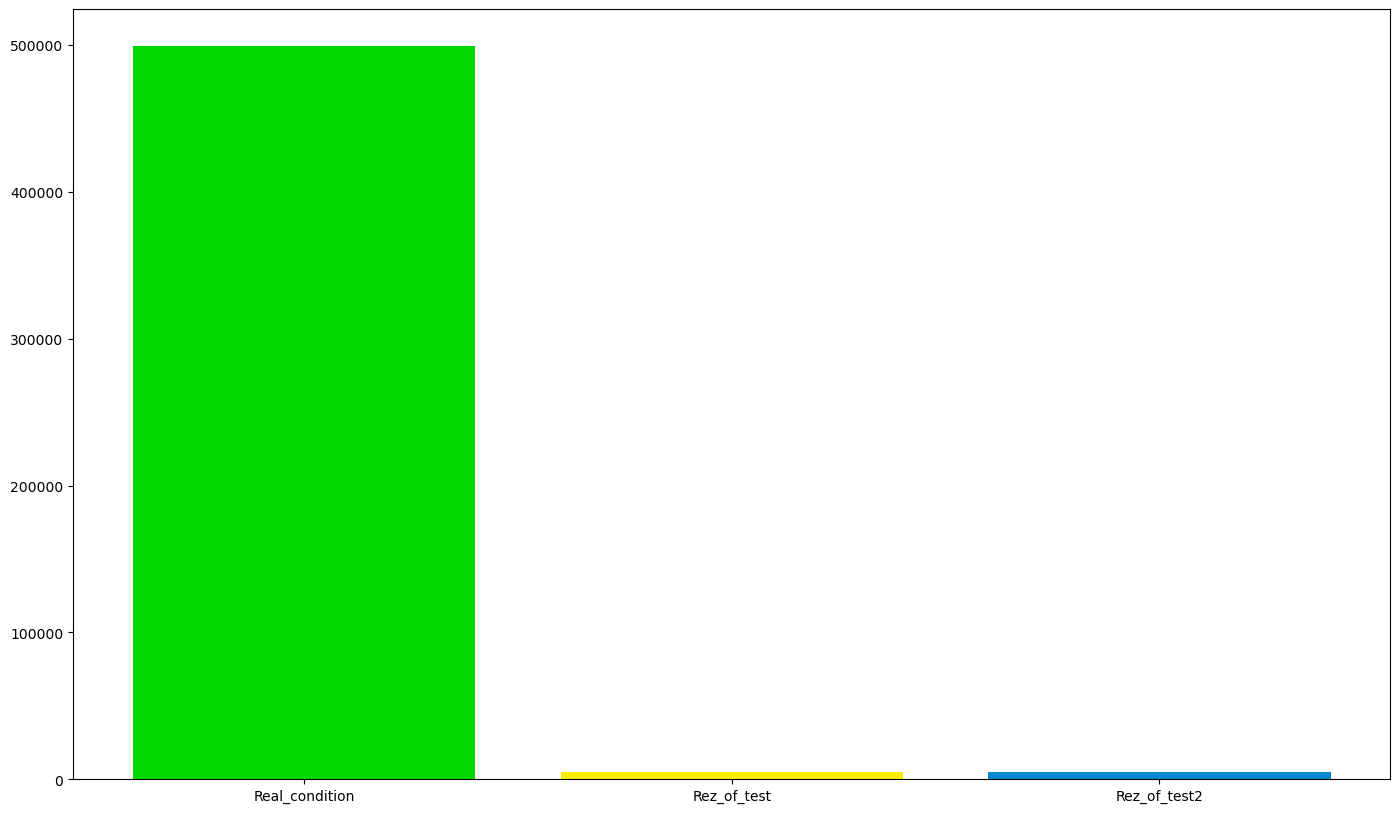

In [13]:
plt.figure(figsize=(17,10))
ax = plt.bar(df.columns,
                 [df[(df['Real_condition'] == 'H')].shape[0], 
                 df[(df['Real_condition'] == 'H') & (df['Rez_of_test'] == conditions[1])].shape[0], 
                 df[(df['Real_condition'] == 'H') & (df['Rez_of_test'] == conditions[1])
                                                  & (df['Rez_of_test2'] == conditions[0])].shape[0]], 
                color = ['#00D900','#FAED00', '#0087CD']     
            )

#### _информативно, не так ли?_ 


## _а так наглядней?_  


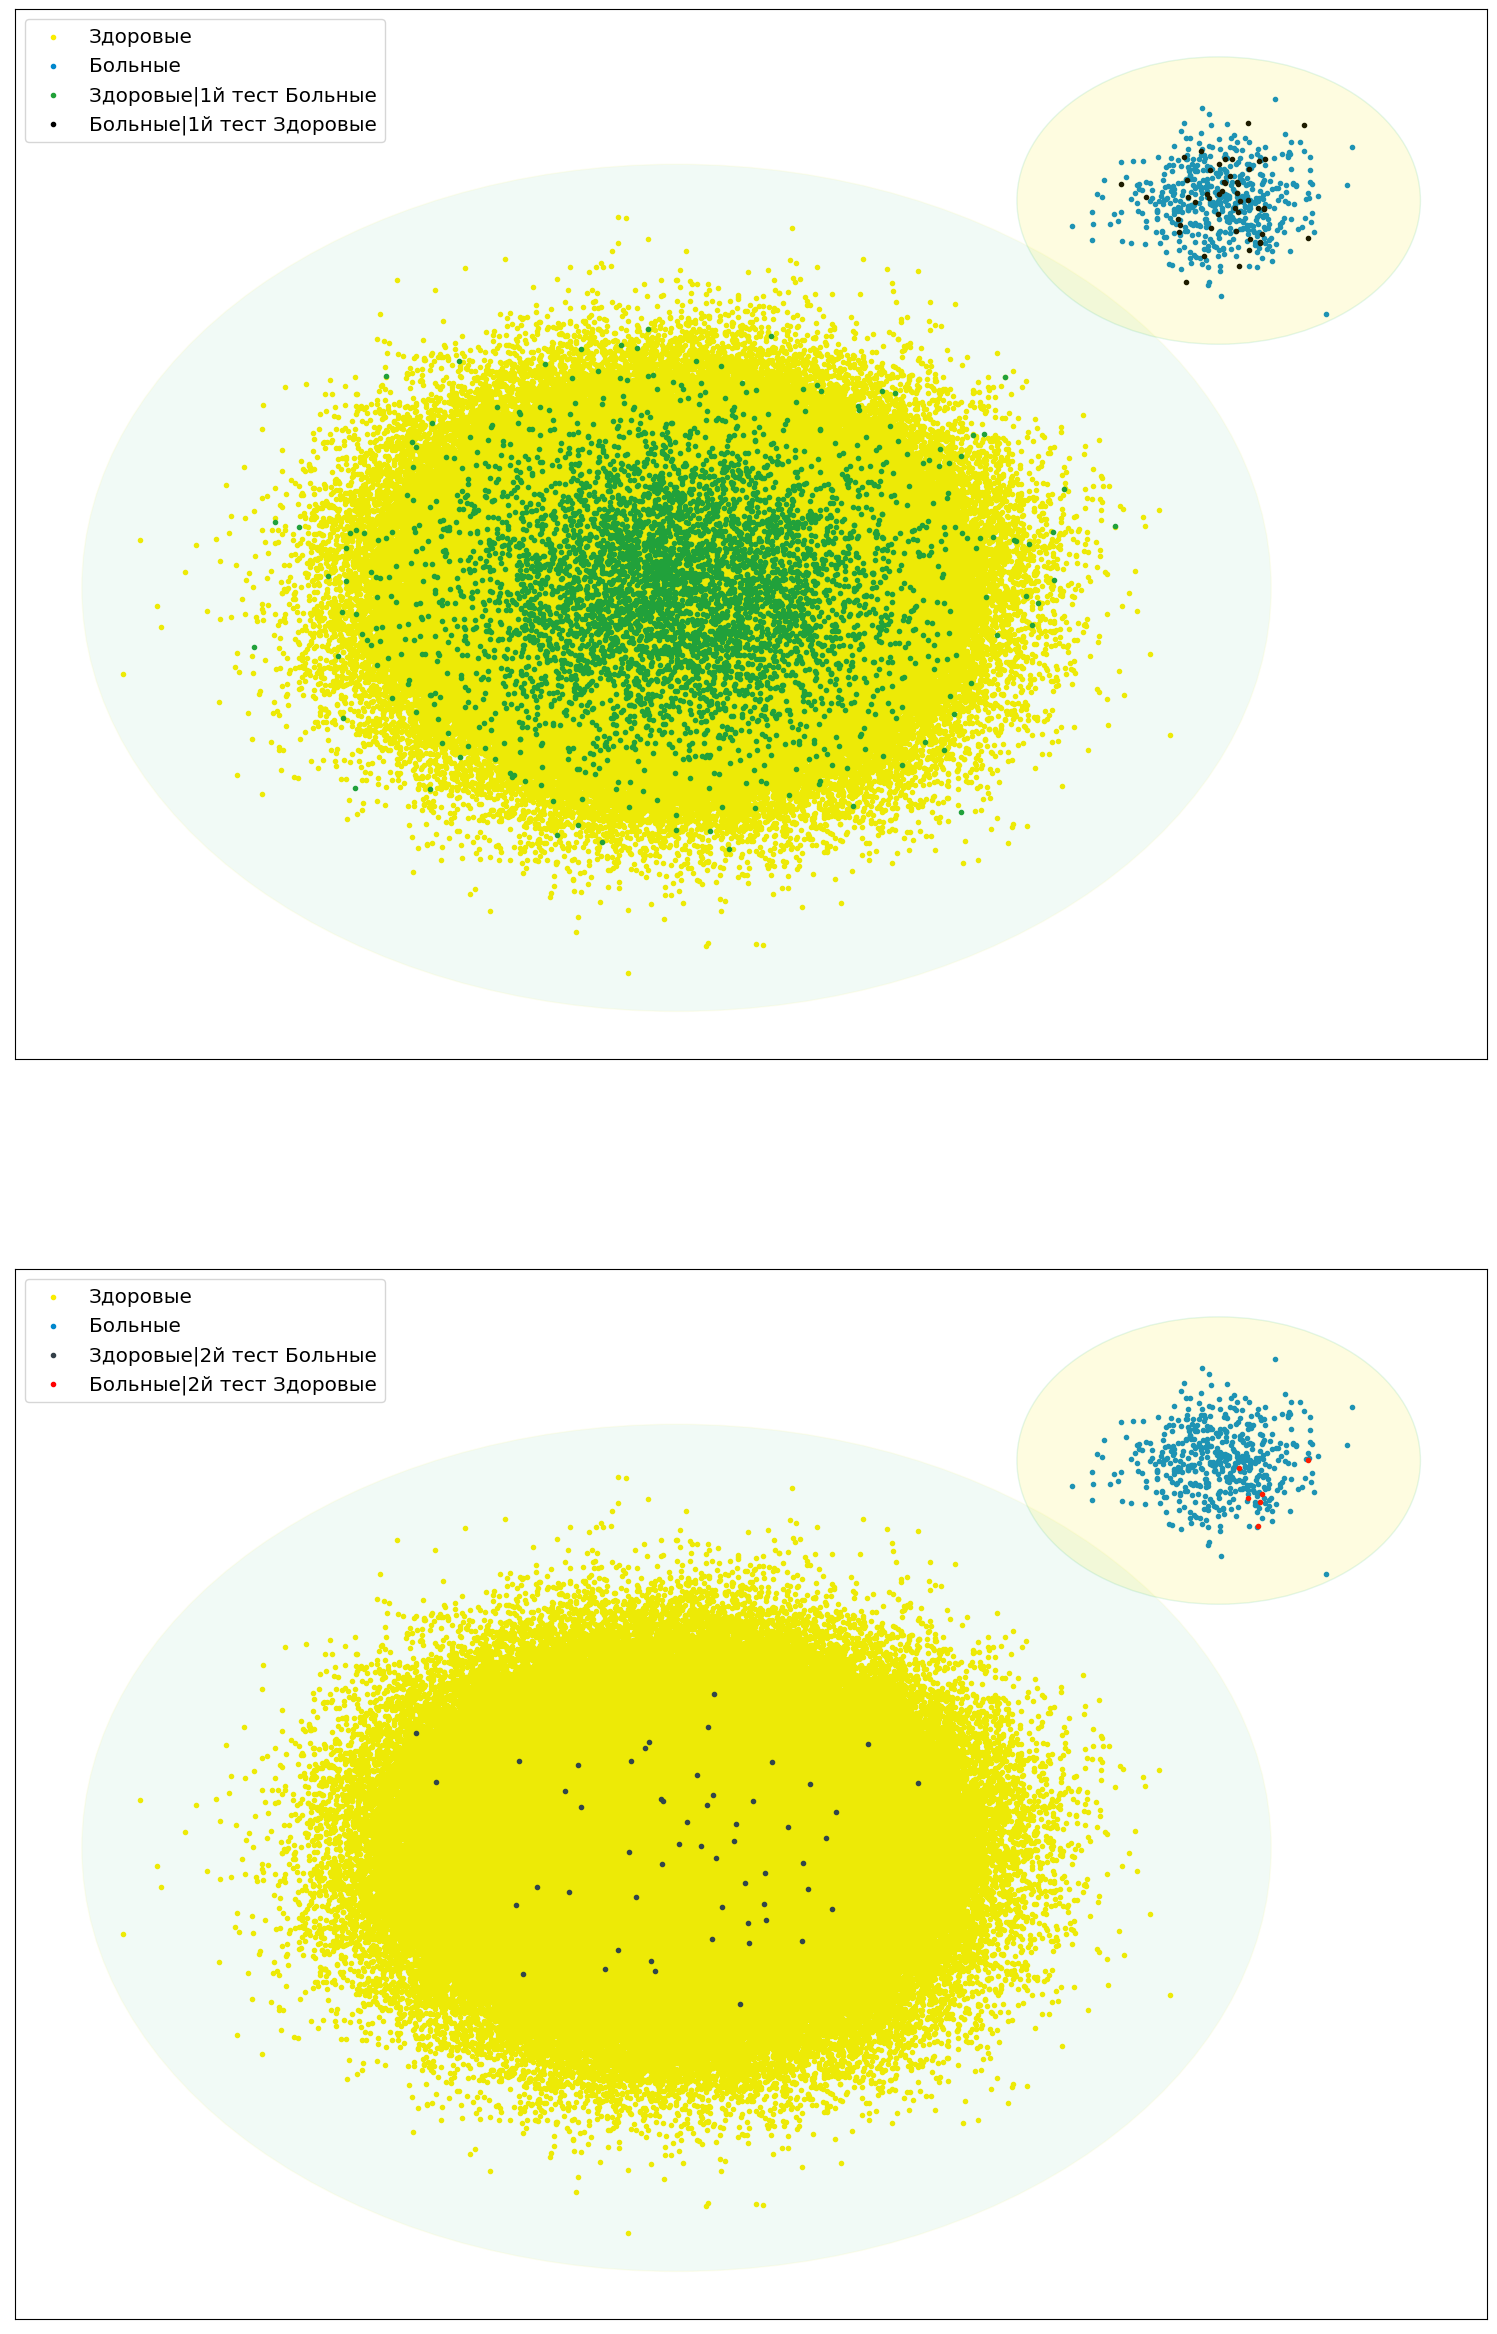

In [16]:
#### выражаем координаты здоровых и больных 
np.random.seed(seed=0)

x1, y1 = np.random.normal(loc=-150, 
                          scale=10000, 
                          size=(2, df[(df['Real_condition']==conditions[0])].shape[0]))
                       
                      

x2, y2 = np.random.normal(loc=49000, scale=4000, size=(2,df[(df['Real_condition']==conditions[1])].shape[0]))

fig1, (ax, ax2) = plt.subplots(2,1, figsize=(19,30))
ax.scatter(x1, y1, marker=".", color='#FAED00', label = 'Здоровые')
ax.scatter(x2, y2, marker=".", color='#0087CD', label = 'Больные')
ax2.scatter(x1, y1, marker=".", color='#FAED00', label = 'Здоровые')
ax2.scatter(x2, y2, marker=".", color='#0087CD', label = 'Больные')

# координаты ложноположительных результатов первого теста
x3 = np.random.choice(x1, 
                      size=df[(df['Real_condition'] == 'H') & (df['Rez_of_test'] == conditions[1])].shape[0],
                      replace=False)

y3 = [y for i, y in enumerate (y1) if x1[i] in x3]
assert len(x3)==len(y3)
ax.scatter(x3, y3, marker="." , color='#21A038', label = 'Здоровые|1й тест Больные')


# координаты ложноположительных результатов  второго теста
x4 = np.random.choice(x3, 
                      size=df[(df['Real_condition'] == 'H') 
                              & (df['Rez_of_test'] == conditions[1])
                              & (df['Rez_of_test2'] == conditions[1])].shape[0],
                      replace=False)

y4 = [y for i, y in enumerate (y3) if x3[i] in x4]
assert len(x4)==len(y4)
ax2.scatter(x4, y4, marker=".", color='#333F48',label = 'Здоровые|2й тест Больные')


# координаты ложноотрицательных результатов первого теста
x5 = np.random.choice(x2, 
                      size=df[(df['Real_condition'] == conditions[1]) 
                              & (df['Rez_of_test'] == conditions[0])].shape[0],
                      replace=False)

y5 = [y for i, y in enumerate (y2) if x2[i] in x5]
assert len(x5)==len(y5)
ax.scatter(x5, y5, marker="." , color='#000000', label = 'Больные|1й тест Здоровые')

# координаты ложноотрицательных результатов второго теста
x6 = np.random.choice(x5, 
                      size=df[(df['Real_condition'] == conditions[1]) 
                              & (df['Rez_of_test'] == conditions[0])
                              & (df['Rez_of_test2'] == conditions[0])].shape[0],
                      replace=False)

y6 = [y for i, y in enumerate (y5) if x5[i] in x6]
assert len(x6)==len(y6)
ax2.scatter(x6, y6, marker="." , color='red', label = 'Больные|2й тест Здоровые')

def encircle2(x,y, ax=ax, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    mean = np.mean(p, axis=0)
    d = p-mean
    r = np.max(np.sqrt(d[:,0]**2+d[:,1]**2 ))
    circ = plt.Circle(mean, radius=1.05*r,**kw)
    ax.add_patch(circ)

for a in (ax,ax2):
    encircle2(x1, y1, ax=a, ec="#FAED00", fc="#21BA72", alpha=0.06)
    encircle2(x2, y2, ax=a, ec="#21BA72", fc="#FAED00", alpha=0.12)
    a.set_xticks([])
    a.set_yticks([])
    a.legend(fontsize='x-large')


plt.show()